In [ ]:
import pandas as pd
import numpy as np
import random
import requests

!pip install seaborn
!pip install dask
!pip install pyspark

import pyspark

import dask.dataframe as dd

# Don't forget to 'pip install seaborn'
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 199 kB 34.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=80badbe8baf1b23eb5e9f58b259663587517be02a0f0a535f2b5a8fe7eae0982
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('task2').getOrCreate()
spark

In [ ]:
data1 = pd.read_csv('https://raw.githubusercontent.com/Latentview/Hackathon/main/*.csv')
# data2 = pd.read_csv('https://raw.githubusercontent.com/Latentview/Hackathon/main/Samplehockeyplayerdata_-_Day2%20(1).csv')
# data3 = pd.read_csv('https://raw.githubusercontent.com/Latentview/Hackathon/main/Samplehockeyplayerdata_-_Day30%20(1).csv')

HTTPError: ignored

In [ ]:
data1.head()

,Team,Country,NameF,NameL,Weight,Height,DOB,Hometown,Prov,Pos,Age,HeightFt,HtIn,BMI
0,Women,Canada,Meghan,Agosta,148,5'7,2/12/1987,Ruthven,Ont.,Forward,35,5.58,67.0,23
1,Women,Canada,Rebecca,Johnston,148,5'9,9/24/1989,Sudbury,Ont.,Forward,32,5.75,69.0,22
2,Women,Canada,Laura,Stacey,156,5'10,5/5/1994,Kleinburg,Ont.,Forward,28,5.83,70.0,22
3,Women,Canada,Jennifer,Wakefield,172,5'10,6/15/1989,Pickering,Ont.,Forward,33,5.83,70.0,25
4,Women,Canada,Jillian,Saulnier,144,5'5,3/7/1992,Halifax,N.S.,Forward,30,5.42,65.0,24


In [ ]:
data2.head()

,Team,Country,NameF,NameL,Weight,Height,DOB,Hometown,Prov,Pos,Age,HeightFt,HtIn,BMI
0,Women,USA,Kendall,Coyne,123,5'2,5/25/1992,Palos Heights,Ill.,Forward,30,5.17,62.0,22
1,Women,USA,Brianna,Decker,150,5'4,5/13/1991,Dousman,Wis.,Forward,31,5.33,64.0,26
2,Women,USA,Meghan,Duggan,164,5'10,9/3/1987,Danvers,Mass.,Forward,34,5.83,70.0,24
3,Women,USA,Kali,Flanagan,142,5'4,9/19/1995,Burlington,Mass.,Defence,26,5.33,64.0,24
4,Women,USA,Nicole,Hensley,155,5'7,6/23/1994,Lakewood,Colo.,Goalie,28,5.58,67.0,24


In [ ]:
data3.head()

,Team,Country,NameF,NameL,Weight,Height,DOB,Hometown,Prov,Pos,Age,HeightFt,HtIn,BMI,NameM
0,Men,Canada,Eric,O’Dell,201,6'1,6/21/1990,Ottawa,Ont.,Forward,32,6.08,73.0,27,E
1,Men,Canada,Maxim,Lapierre,216,6'0,3/29/1985,Brossard,Que.,Forward,37,6.00,72.0,29,M
2,Men,Canada,Linden,Vey,190,6'0,7/17/1991,Wakaw,Sask.,Forward,31,6.00,72.0,26,L
3,Men,Canada,Christian,Thomas,174,5'9,5/26/1992,Toronto,Ont.,Forward,30,5.75,69.0,26,C
4,Men,Canada,Karl,Stollery,181,5'11,11/21/1987,Camrose,Alta.,Defence,34,5.92,71.0,25,K


In [ ]:
dataframes = [data1, data2, data3]
 
combined = pd.concat(dataframes)
combined

,Team,Country,NameF,NameL,Weight,Height,DOB,Hometown,Prov,Pos,Age,HeightFt,HtIn,BMI,NameM
0,Women,Canada,Meghan,Agosta,148,5'7,2/12/1987,Ruthven,Ont.,Forward,35,5.58,67.0,23,NaN
1,Women,Canada,Rebecca,Johnston,148,5'9,9/24/1989,Sudbury,Ont.,Forward,32,5.75,69.0,22,NaN
2,Women,Canada,Laura,Stacey,156,5'10,5/5/1994,Kleinburg,Ont.,Forward,28,5.83,70.0,22,NaN
3,Women,Canada,Jennifer,Wakefield,172,5'10,6/15/1989,Pickering,Ont.,Forward,33,5.83,70.0,25,NaN
4,Women,Canada,Jillian,Saulnier,144,5'5,3/7/1992,Halifax,N.S.,Forward,30,5.42,65.0,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,Men,USA,Ryan,Stoa,210,6'3,4/13/1987,Bloomington,Minn.,Forward,35,6.25,75.0,26,R
36,Men,USA,Troy,Terry,179,6'0,9/10/1997,Highlands Ranch,Colo.,Forward,24,6.00,72.0,24,T
37,Men,USA,Noah,Welch,215,6'4,8/26/1982,Brighton,Mass.,Defence,39,6.33,76.0,26,N
38,Men,USA,James,Wisniewski,205,6'0,2/21/1984,Canton,Mich.,Defence,38,6.00,72.0,28,J


Cleaninng and Normalizing Data

In [ ]:
combined = combined.drop(['Height','HeightFt'], axis=1)

In [ ]:
combined["Height(cm)"] = round(combined["HtIn"] * 2.5, 1) 

In [ ]:
combined = combined.drop(['HtIn'], axis=1)

In [ ]:
combined.NameM = combined.NameM.fillna('NA')
combined.DOB = combined.DOB.fillna('NA')

In [ ]:
combined['DOB_clean'] = np.where(combined['DOB'].str.contains('/'), pd.to_datetime(combined['DOB']).dt.strftime('%m/%d/%Y'), pd.to_datetime(combined['DOB'], dayfirst=True).dt.strftime('%m/%d/%Y'))

In [ ]:
combined.head()

,Team,Country,NameF,NameL,Weight,DOB,Hometown,Prov,Pos,Age,BMI,NameM,Height(cm),DOB_clean
0,Women,Canada,Meghan,Agosta,148,02/12/1987,Ruthven,Ont.,Forward,35,23,NA,167.5,02/12/1987
1,Women,Canada,Rebecca,Johnston,148,09/24/1989,Sudbury,Ont.,Forward,32,22,NA,172.5,09/24/1989
2,Women,Canada,Laura,Stacey,156,05/05/1994,Kleinburg,Ont.,Forward,28,22,NA,175.0,05/05/1994
3,Women,Canada,Jennifer,Wakefield,172,06/15/1989,Pickering,Ont.,Forward,33,25,NA,175.0,06/15/1989
4,Women,Canada,Jillian,Saulnier,144,03/07/1992,Halifax,N.S.,Forward,30,24,NA,162.5,03/07/1992


In [ ]:
combined.describe()

,Weight,Age,BMI,Height(cm)
count,96.000000,96.000000,96.000000,96.000000
mean,172.333333,32.458333,24.947917,173.723958
std,25.228500,4.262237,1.915971,8.645008
min,123.000000,23.000000,20.000000,152.500000
25%,150.000000,29.750000,24.000000,167.500000
50%,174.000000,33.000000,25.000000,172.500000
75%,190.000000,35.000000,26.000000,180.000000
max,235.000000,43.000000,29.000000,192.500000


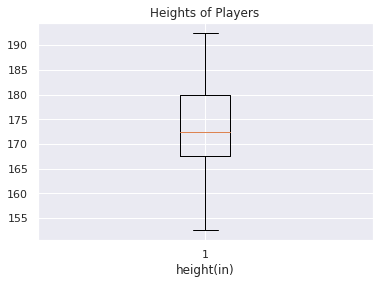

In [ ]:
plt.boxplot(combined['Height(cm)'])
plt.title("Heights of Players")
plt.xlabel("height(in)")
plt.show()

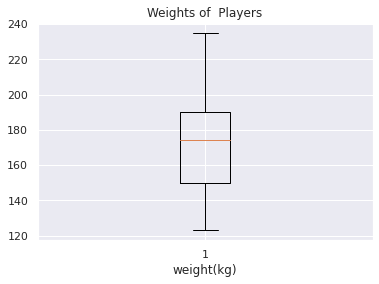

In [ ]:
plt.boxplot(combined['Weight'])
plt.title("Weights of  Players")
plt.xlabel("weight(kg)")
plt.show()

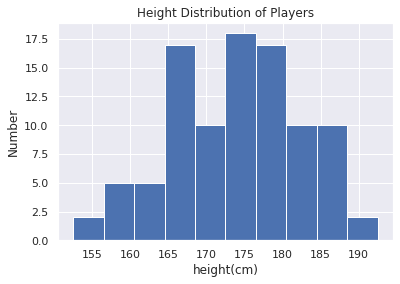

In [ ]:
sns.set()
plt.hist(combined['Height(cm)'])
plt.title("Height Distribution of Players")
plt.xlabel("height(cm)")
plt.ylabel("Number")
plt.show()

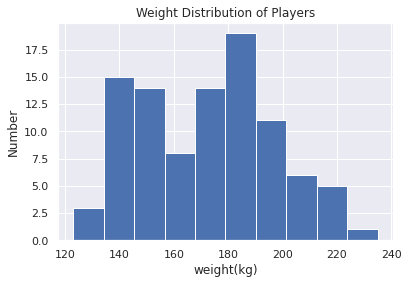

In [ ]:
sns.set()
plt.hist(combined['Weight'])
plt.title("Weight Distribution of Players")
plt.xlabel("weight(kg)")
plt.ylabel("Number")
plt.show()

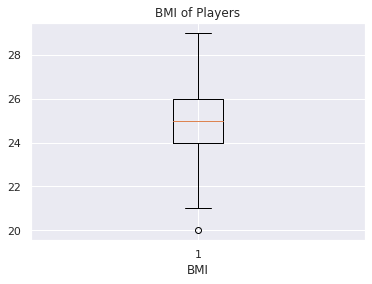

In [ ]:
plt.boxplot(combined['BMI'])
plt.title("BMI of Players")
plt.xlabel("BMI")
plt.show()

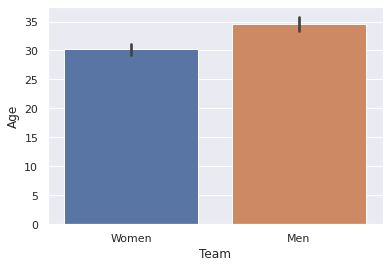

In [ ]:
sns.barplot(x = combined['Team'], y = combined['Age'], data = combined)
plt.show()

In [ ]:
combined.to_csv('final-data.csv')